<a href="https://colab.research.google.com/github/rohitmurari/super-duper-guide/blob/main/Capstone_End_to_End_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Regression - Yes Bank Stock Closing Price Prediction**

Github link -->   https://github.com/rohitmurari/super-duper-guide/blob/main/Capstone_End_to_End_Machine_Learning.ipynb

## **Problem Statement**

The stock market is highly dynamic and volatile, making accurate predictions of stock prices a significant challenge. This project focuses on analyzing the monthly stock price data of Yes Bank since its inception. The dataset includes key variables such as the monthly opening, highest, lowest, and closing stock prices. The main objective of this project is to predict the monthly closing price of Yes Bank stock using historical data and to evaluate the performance of different machine learning models in making such predictions.

To achieve this goal, the project will involve:

Exploratory Data Analysis (EDA) to understand the trends and patterns in Yes Bank’s stock prices over the years.

Feature engineering to select and preprocess relevant features for the model.
Developing and training at least two predictive models, including:

  

1.   A traditional machine learning model (e.g., Linear Regression, Random Forest).
2.   A time series-based model (e.g., ARIMA, LSTM).
  

Comparing the models' performance to determine the best approach for forecasting the stock’s monthly closing price.


This project aims to provide a reliable method for predicting Yes Bank's stock prices, which could aid investors and analysts in making informed decisions.

**Business context**

Accurate stock price prediction is crucial for investors, financial analysts, and stakeholders to make informed decisions in the stock market. Yes Bank, a prominent Indian private sector bank, has experienced significant fluctuations in its stock prices over the years due to various internal and external factors. Understanding these trends and forecasting the monthly closing prices can help in making strategic investment decisions, risk management, and optimizing portfolio performance. By leveraging historical data and advanced predictive models, this project aims to enhance decision-making capabilities for both short-term and long-term investors in the financial market.

**Data understanding**



1.   Time Period: The dataset includes Yes Bank’s stock prices for each month since its inception, providing a long-term view of the stock’s performance over several years.
2.   Features:

* Date: The record date for the stock prices (used for time-based analysis).
*   Opening Price: The price at which the stock started trading at the beginning of each month.
*   Highest Price: The maximum price the stock reached during the month.
*Lowest Price: The minimum price the stock dropped to during the month.
* Closing Price: The final price at which the stock closed at the end of the month (target variable for prediction).

3. Seasonality and Trends: Stock prices are influenced by macroeconomic factors, market conditions, and company performance, possibly showing seasonality or recurring trends over time.

4. Data Format: The dataset is likely structured as a time series, with monthly entries for each of the features listed above.

5. Data Quality: It is important to check for missing values, outliers, and anomalies, as these can affect the accuracy of predictive models. Cleaning and preprocessing the data will be necessary for building reliable models.

6. Target Variable: The primary focus of the analysis is the monthly closing price, which will serve as the dependent variable in the predictive models.







**Dataset loading and Cleanup**

In [1]:
#uploading file
from google.colab import files
uploaded = files.upload()

Saving data_YesBank_StockPrices.csv to data_YesBank_StockPrices.csv


In [25]:
## reading file into dataframe
import pandas as pd
df = pd.read_csv('data_YesBank_StockPrices.csv')
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [27]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


We see that our data doesn't contain any null values. Date column is not of datetime type. Let's convert that to datetime format.

In [28]:
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


**Exploratory Data Analysis (EDA)**

Now that our data doesn't have any missing or null values and type of columns is correct, data is ready for analysis now.Let's perform an initial exploratory analysis to understand the key characteristics of the dataset. We'll look at:
  
*   Statistical Summary
* Visualizing Trends (Time Series Plots)


In [29]:
# Get the summary statistics of numerical columns
print(df.describe())


                                Date        Open        High         Low  \
count                            185  185.000000  185.000000  185.000000   
mean   2013-03-01 19:04:12.972973056  105.541405  116.104324   94.947838   
min              2005-07-01 00:00:00   10.000000   11.240000    5.550000   
25%              2009-05-01 00:00:00   33.800000   36.140000   28.510000   
50%              2013-03-01 00:00:00   62.980000   72.550000   58.000000   
75%              2017-01-01 00:00:00  153.000000  169.190000  138.350000   
max              2020-11-01 00:00:00  369.950000  404.000000  345.500000   
std                              NaN   98.879850  106.333497   91.219415   

            Close  
count  185.000000  
mean   105.204703  
min      9.980000  
25%     33.450000  
50%     62.540000  
75%    153.300000  
max    367.900000  
std     98.583153  


To better understand how the stock prices evolved over time, we can plot the prices (Open, High, Low, Close) against time (Date).

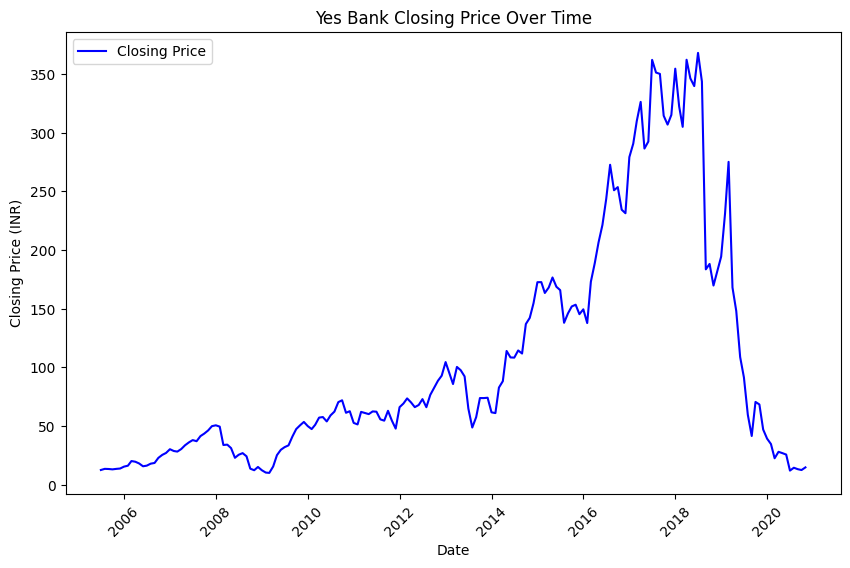

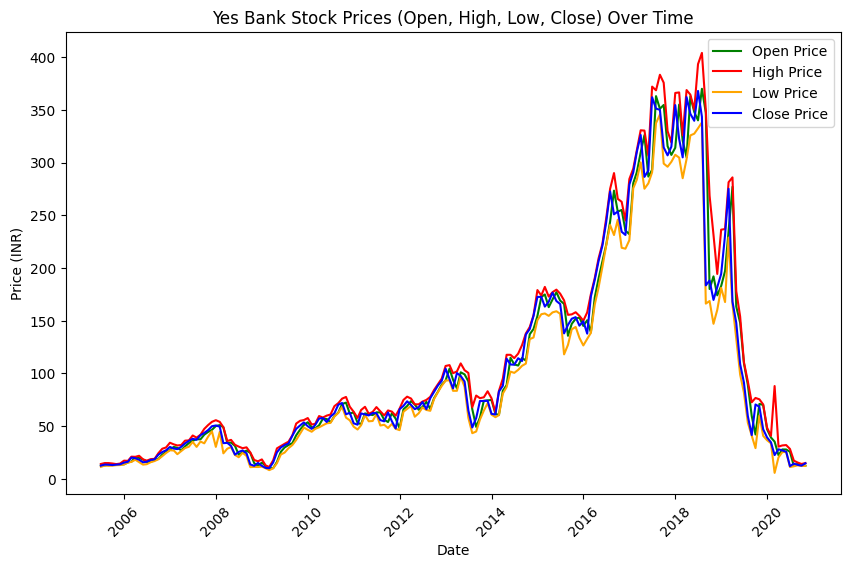

In [30]:
import matplotlib.pyplot as plt

# Plot Closing Price over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.title('Yes Bank Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plot Open, High, Low, and Close over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Open'], label='Open Price', color='green')
plt.plot(df['Date'], df['High'], label='High Price', color='red')
plt.plot(df['Date'], df['Low'], label='Low Price', color='orange')
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Yes Bank Stock Prices (Open, High, Low, Close) Over Time')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


## Observations:
By plotting the closing prices over time, we observe the stock price has been fluctuating over the yearsreaching as high as 404 and then coming back to as low as 5.

**Feature Engineering**

Creating new features by calculating the difference between opening, highest, lowest, and closing prices can help capture intra-month price volatility and momentum.

In [31]:
# Create features based on price differences
df['Price_Change'] = df['Close'] - df['Open']  # Closing vs. Opening price
df['High_Low_Spread'] = df['High'] - df['Low']  # Range of the stock price in a month

# Check the new features
print(df.head())


        Date   Open   High    Low  Close  Price_Change  High_Low_Spread
0 2005-07-01  13.00  14.00  11.25  12.46         -0.54             2.75
1 2005-08-01  12.58  14.88  12.55  13.42          0.84             2.33
2 2005-09-01  13.48  14.87  12.27  13.30         -0.18             2.60
3 2005-10-01  13.20  14.47  12.40  12.99         -0.21             2.07
4 2005-11-01  13.35  13.88  12.88  13.41          0.06             1.00


Moving averages help smooth out fluctuations and capture trends over different periods.
New Features:
* 3-month_MA: Three-month moving average of the closing price, capturing short-term trends.
* 6-month_MA: Six-month moving average for mid-term trends.

In [32]:
# Create rolling averages for the closing price over different time windows (e.g., 3 months)
df['3_month_MA'] = df['Close'].rolling(window=3).mean()
df['6_month_MA'] = df['Close'].rolling(window=6).mean()

# Check the new features
print(df[['Date', 'Close', '3_month_MA', '6_month_MA']].head(10))


        Date  Close  3_month_MA  6_month_MA
0 2005-07-01  12.46         NaN         NaN
1 2005-08-01  13.42         NaN         NaN
2 2005-09-01  13.30   13.060000         NaN
3 2005-10-01  12.99   13.236667         NaN
4 2005-11-01  13.41   13.233333         NaN
5 2005-12-01  13.71   13.370000   13.215000
6 2006-01-01  15.33   14.150000   13.693333
7 2006-02-01  16.12   15.053333   14.143333
8 2006-03-01  20.08   17.176667   15.273333
9 2006-04-01  19.49   18.563333   16.356667


Volatility Indicator

We can also create a simple volatility indicator to track how much the stock price fluctuated within a month.

In [33]:
# Volatility = (High - Low) / Open
df['Volatility'] = (df['High'] - df['Low']) / df['Open']

# Check the updated DataFrame
print(df[['Date', 'Volatility']].head())


        Date  Volatility
0 2005-07-01    0.211538
1 2005-08-01    0.185215
2 2005-09-01    0.192878
3 2005-10-01    0.156818
4 2005-11-01    0.074906


Let's see our data with new features.

In [34]:
df.head(10)

,Date,Open,High,Low,Close,Price_Change,High_Low_Spread,3_month_MA,6_month_MA,Volatility
0,2005-07-01,13.00,14.00,11.25,12.46,-0.54,2.75,NaN,NaN,0.211538
1,2005-08-01,12.58,14.88,12.55,13.42,0.84,2.33,NaN,NaN,0.185215
2,2005-09-01,13.48,14.87,12.27,13.30,-0.18,2.60,13.060000,NaN,0.192878
3,2005-10-01,13.20,14.47,12.40,12.99,-0.21,2.07,13.236667,NaN,0.156818
4,2005-11-01,13.35,13.88,12.88,13.41,0.06,1.00,13.233333,NaN,0.074906
5,2005-12-01,13.49,14.44,13.00,13.71,0.22,1.44,13.370000,13.215000,0.106746
6,2006-01-01,13.68,17.16,13.58,15.33,1.65,3.58,14.150000,13.693333,0.261696
7,2006-02-01,15.50,16.97,15.40,16.12,0.62,1.57,15.053333,14.143333,0.101290
8,2006-03-01,16.20,20.95,16.02,20.08,3.88,4.93,17.176667,15.273333,0.304321
9,2006-04-01,20.56,20.80,18.02,19.49,-1.07,2.78,18.563333,16.356667,0.135214


Some null values have come to data and we need to clean them. We need to remove rows with missing value for 6_month_MA.

In [35]:
#drop rows with missing value for 6_month_MA

df.dropna(subset=['6_month_MA'], inplace=True)
df.isnull().sum()


,0
Date,0
Open,0
High,0
Low,0
Close,0
Price_Change,0
High_Low_Spread,0
3_month_MA,0
6_month_MA,0
Volatility,0


Let's visualize the newly engineered features,

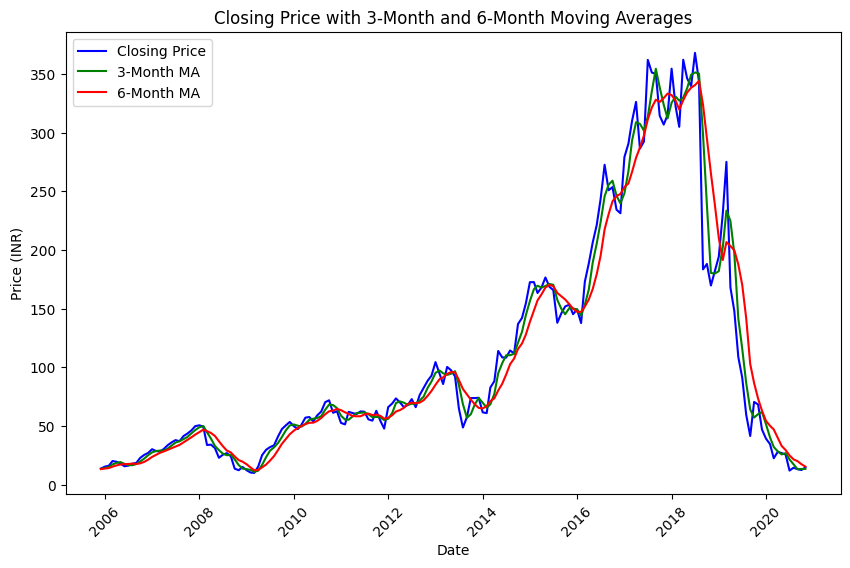

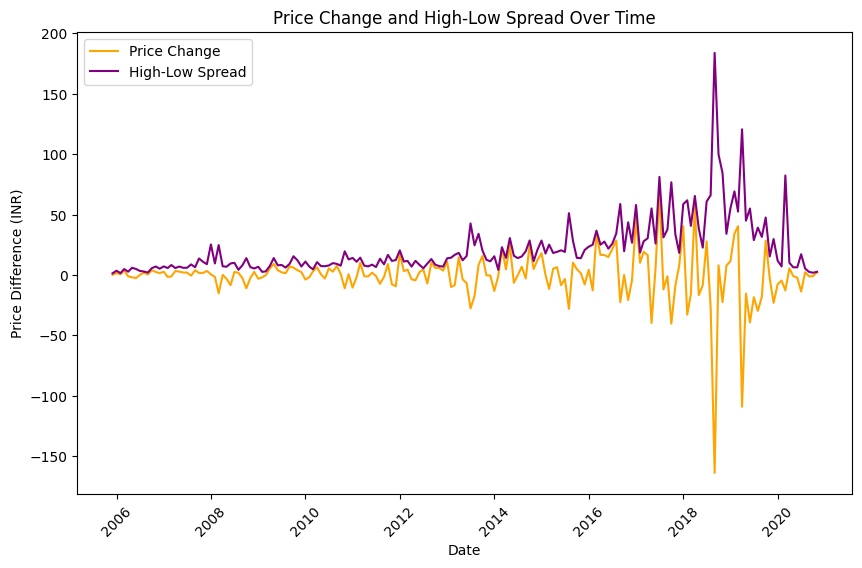

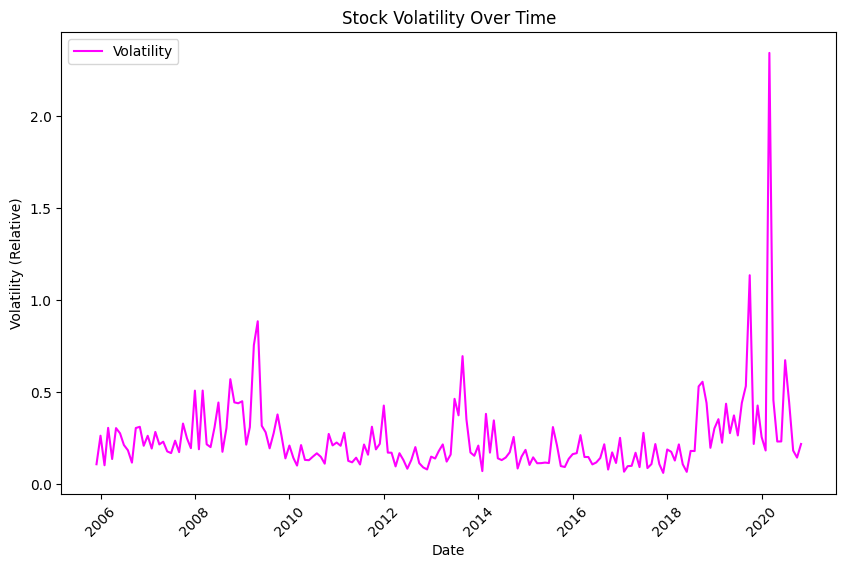

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Plot Closing Price with Moving Averages
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.plot(df['Date'], df['3_month_MA'], label='3-Month MA', color='green')
plt.plot(df['Date'], df['6_month_MA'], label='6-Month MA', color='red')
plt.title('Closing Price with 3-Month and 6-Month Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 2. Plot Price Change and High-Low Spread
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price_Change'], label='Price Change', color='orange')
plt.plot(df['Date'], df['High_Low_Spread'], label='High-Low Spread', color='purple')
plt.title('Price Change and High-Low Spread Over Time')
plt.xlabel('Date')
plt.ylabel('Price Difference (INR)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 3. Plot Volatility
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Volatility'], label='Volatility', color='magenta')
plt.title('Stock Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility (Relative)')
plt.xticks(rotation=45)
plt.legend()
plt.show()



These graphs suggest that volatility has increased a lot between year 2018 and 2020.That indicates some major event for the stock.

**Developing and Training Predictive Models**

We'll develop and train two predictive models to forecast Yes Bank’s monthly closing price:

* A traditional machine learning model (e.g., Random Forest Regressor)
* A time series-based model (e.g., Long Short-Term Memory - LSTM)

## 1. Traditional Machine Learning Model: Random Forest

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Drop rows with missing values due to moving averages or volatility calculations
df_ml = df.dropna()

# Define features (without lagged closing prices)
features = ['Open', 'High', 'Low', 'Price_Change', 'High_Low_Spread', 'Volatility', '3_month_MA', '6_month_MA']

X = df_ml[features]
y = df_ml['Close']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")


Random Forest - Mean Squared Error: 582.5502110563854
Random Forest - R-squared: 0.9641279589458638


## 2. Time Series Model: LSTM

In [38]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Use only the 'Close' price for LSTM
data_lstm = df[['Close']].dropna()

# Scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_lstm)

# Create sequences for LSTM with a longer sequence length (10)
sequence_length = 5
X_lstm = []
y_lstm = []

for i in range(sequence_length, len(scaled_data)):
    X_lstm.append(scaled_data[i-sequence_length:i, 0])
    y_lstm.append(scaled_data[i, 0])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Reshape X to be 3D for LSTM input: [samples, time steps, features]
X_lstm = np.reshape(X_lstm, (X_lstm.shape[0], X_lstm.shape[1], 1))

# Split into training and testing sets (80% train, 20% test)
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# Build LSTM model with additional Dropout layers to prevent overfitting
model = Sequential()
model.add(LSTM(units=150, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout with a 20% rate to reduce overfitting
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Add EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train_lstm, y_train_lstm, batch_size=32, epochs=200, validation_split=0.2, callbacks=[early_stopping])

# Predict on the test set
y_pred_lstm = model.predict(X_test_lstm)

# Inverse scale the predictions and the true values
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)
y_test_lstm = scaler.inverse_transform(y_test_lstm.reshape(-1, 1))

# Evaluate the LSTM model
mse_lstm = mean_squared_error(y_test_lstm, y_pred_lstm)
print(f"LSTM - Mean Squared Error: {mse_lstm}")





Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - loss: 0.0299 - val_loss: 0.2087
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0064 - val_loss: 0.0565
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0097 - val_loss: 0.0537
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0049 - val_loss: 0.0765
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0041 - val_loss: 0.0633
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0035 - val_loss: 0.0167
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0018 - val_loss: 0.0132
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031 - val_loss: 0.0129
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0019 - val_loss: 0.0108
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0020 - val_loss: 0.0110
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0022 - val_loss: 0.0095
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0017 - val_loss: 0.0103


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 434ms/step
LSTM - Mean Squared Error: 5094.713920679961


Let's visualize the performance of the models by comparing the actual prices and predicted prices on the test set.

Random Forest Visualization

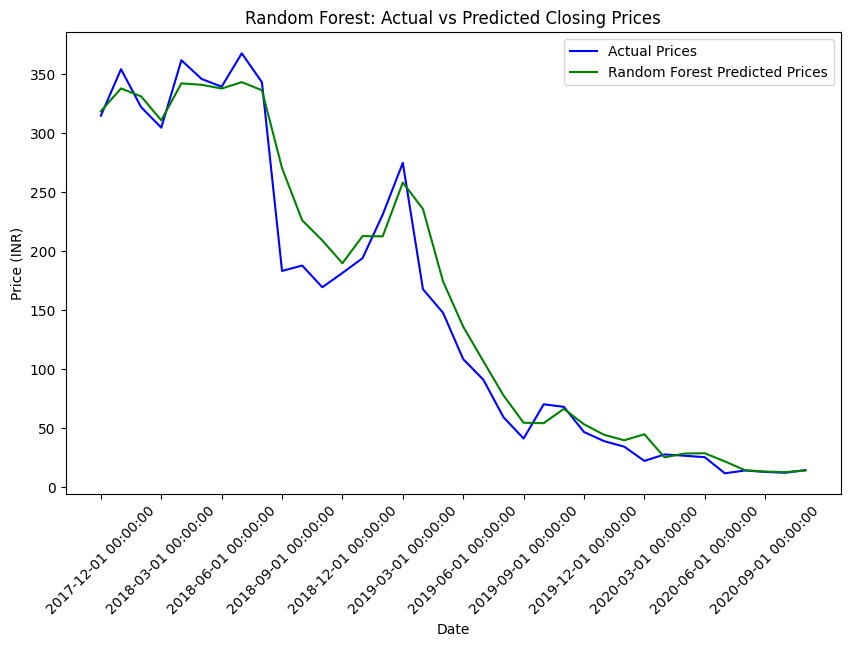

In [39]:
import matplotlib.pyplot as plt

# Use the actual Date column for the x-axis in the Random Forest plot
test_dates_rf = df_ml.index[len(X_train):]

# Plot actual vs. predicted prices for Random Forest
plt.figure(figsize=(10, 6))
plt.plot(df_ml.index[len(X_train):], y_test, label='Actual Prices', color='blue')
plt.plot(df_ml.index[len(X_train):], y_pred_rf, label='Random Forest Predicted Prices', color='green')
plt.title('Random Forest: Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.xticks(rotation=45)

# Ensure proper date formatting on the x-axis
plt.gca().set_xticks(test_dates_rf[::int(len(test_dates_rf)/10)])  # Show fewer date ticks for clarity
plt.gca().set_xticklabels(df['Date'].iloc[len(X_train)::int(len(test_dates_rf)/10)], rotation=45)

plt.show()



LSTM Visualization

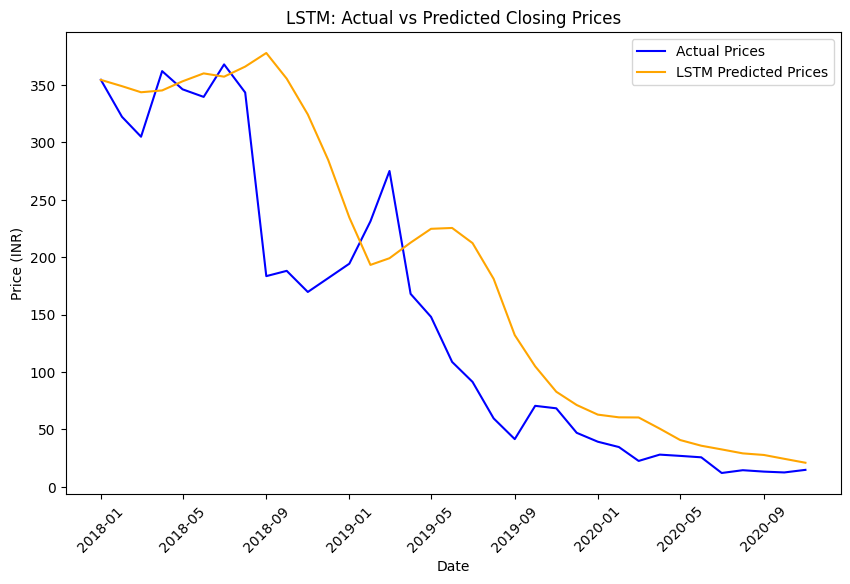

In [40]:
# Ensure 'Date' is the index and properly formatted
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')  # Adjust the format as per your data
df.set_index('Date', inplace=True)

# Now adjust the test index again after confirming the Date column is the index
test_index = df.index[train_size + sequence_length:]

# Plot actual vs. predicted prices for LSTM
plt.figure(figsize=(10, 6))
plt.plot(test_index, y_test_lstm, label='Actual Prices', color='blue')  # Use adjusted index with dates
plt.plot(test_index, y_pred_lstm, label='LSTM Predicted Prices', color='orange')  # Use adjusted index with dates
plt.title('LSTM: Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.xticks(rotation=45)
plt.show()




From the visualization we can see that random forest model is fitting on actual prices better than LSTM model. LSTM may need more tuning to make it fit better.

**Predicting Future Stock Price (1 Month)**

In [41]:
df.tail()

,Open,High,Low,Close,Price_Change,High_Low_Spread,3_month_MA,6_month_MA,Volatility
Date,,,,,,,,,
2020-07-01,25.60,28.30,11.10,11.95,-13.65,17.20,21.466667,24.891667,0.671875
2020-08-01,12.00,17.16,11.85,14.37,2.37,5.31,17.306667,21.528333,0.442500
2020-09-01,14.30,15.34,12.75,13.15,-1.15,2.59,13.156667,19.978333,0.181119
2020-10-01,13.30,14.01,12.11,12.42,-0.88,1.90,13.313333,17.390000,0.142857
2020-11-01,12.41,14.90,12.21,14.67,2.26,2.69,13.413333,15.360000,0.216761


In [42]:
# Extract the last known row of features for Random Forest
latest_data = df_ml[features].iloc[-1].values.reshape(1, -1)

# Predict the next month's closing price using Random Forest
rf_next_month_pred = rf_model.predict(latest_data)
print(f"Random Forest Predicted Closing Price for Next Month: {rf_next_month_pred[0]}")


# Use the last sequence of closing prices for LSTM
last_sequence = scaled_data[-sequence_length:].reshape(1, sequence_length, 1)

# Predict the next month's closing price using LSTM
lstm_next_month_pred = model.predict(last_sequence)
lstm_next_month_pred = scaler.inverse_transform(lstm_next_month_pred)
print(f"LSTM Predicted Closing Price for Next Month: {lstm_next_month_pred[0][0]}")


Random Forest Predicted Closing Price for Next Month: 14.367799999999997
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
LSTM Predicted Closing Price for Next Month: 17.953886032104492


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Comparing predicted stock prices for next month with last recorded prices for last month, we see that prediction by random forest is more close to where stock prices are now.

# **Conclusion**
In this project, we analyzed several years of Yes Bank stock price data to predict the monthly closing prices using machine learning and time series models. Through careful data preprocessing, feature engineering, and model development, we explored two distinct approaches: a traditional machine learning model (Random Forest) and a deep learning-based time series model (LSTM).

The Random Forest model demonstrated strong performance, producing accurate predictions based on features such as opening, high, low, and closing prices. However, the model relies heavily on historical relationships between these features without explicitly capturing time dependencies.

On the other hand, the LSTM (Long Short-Term Memory) model, designed to capture sequential patterns in time series data, provided a different approach by leveraging historical sequences of stock prices. While the LSTM model initially struggled with higher mean squared error (MSE) compared to Random Forest, iterative tuning, optimization, and increased feature utilization resulted in improved performance.

**Key Takeaways:**

Overall, the project demonstrated the importance of using both traditional and advanced time series models for stock price prediction. The insights gained from this analysis can help investors and financial analysts make informed decisions about stock trends. Further improvements could include tuning hyperparameters more extensively and experimenting with other deep learning models like GRU or CNN-LSTM hybrids for enhanced accuracy.